## Linear Least Squares

This is the most common form of linear regression. Let's look at a concrete example...

Let us assume we would like to fit a line to the following three points

$$\{(x_i,y_i)\} = \{(1,2), (2,1), (2.5,2)\}$$

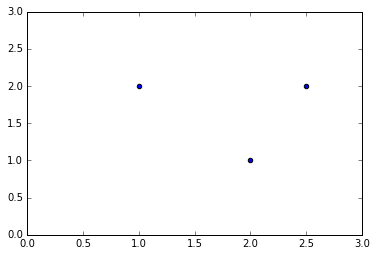

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter((1,2,2.5), (2,1,2)); plt.xlim((0,3)); plt.ylim((0,3));

Another way to express this problem is to say, I would like to find the equation of a line that satisfies all of the above points. Take the following general equation of a line...

$$ \alpha x_i + \beta = y_i $$

We would like to find the parameters $\alpha$ and $\beta$ such that the equality is satisfied for all of the points $(x_i, y_i)$. This can be expressed as a system of equations.

$$\begin{array}{lcl} \alpha (1)+\beta & = & 2 \\ \alpha(2)+ \beta & = & 1 \\ \alpha(2.5)+ \beta & = & 2 \end{array}$$

Now because each equation in the system is **linear**, which I will define in a bit, this system of equations can be expressed in matrix form using Linear Algebra!

$$\begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 2.5 & 1 \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \\ 2 \end{bmatrix}$$

The ideal objective for this overdetermined system is to find the values of $\alpha$ and $\beta$ that make the two columns of the matrix add up to the right hand side, i.e.

$$\alpha\begin{bmatrix} 1 \\ 2 \\ 2.5 \end{bmatrix} + \beta\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \\ 2 \end{bmatrix}$$

In linear algebra notation we express this problem more succinctly as follows

$$A\vec{x} = \vec{b}$$ 

where

$$A = \begin{bmatrix} 1 & 1 \\ 2 & 1 \\ 2.5 & 1 \end{bmatrix} \hspace{10pt} \vec{x} = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \hspace{10pt} \vec{b} = \begin{bmatrix} 2 \\ 1 \\ 2 \end{bmatrix}$$

We know however, via our impressive powers of logic, that there does not exist an equation of a line that can pass through all of the points above, because the points do not lie along a line. In otherwords, there are not such $\alpha$ and $\beta$ that satisfy all of the equations simultaneously. In linear algebra lingo, we say that $\vec{b}$ does not lie in the column space of $A$. Since there is no exact solution, given a value of $\vec{x}$ we can express how far it is from the ideal solution as follows.

$$||\vec{r}|| = ||A\vec{x} - \vec{b}||$$

Given this definition of error we seek to find the "best" solution, $\hat{x}$. We define the best solution to be the values of $\alpha$ and $\beta$ that minimize the magnitude of $||\vec{r}||$, i.e. the error.

$$\hat{x} = \min{||\vec{r}||} = \min_{\vec{x}}{||A\vec{x} - \vec{b}}||$$

As far as theory is concerned, this is an extremely well posed problem. It can be shown that the parameter space is a convex parabola with one global minimum. Even more, because this is posed in the linear world we can solve this
problem directly in one formula

$$\hat{x} = (A^TA)^{-1}A^T\vec{b}$$

For those interested, since $\vec{b}$ is not in the columnspace of $A$, this formula says the "best" solution is the projection of $\vec{b}$ onto the columnspace. Interestingly this is equivalent to solving the above minimization problem. In practice however, it is not very stable or efficient to solve it directly like this. We now plot the line to see how close it is to the points.

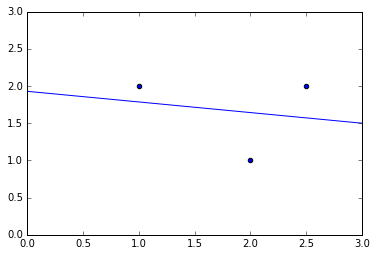

In [15]:
import numpy as np
A = np.array(((1,1),(2,1),(2.5,1))); b = np.array((2,1,2)) # Create A and b
x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b) # Project b onto Col(A)
xvals = np.linspace(0,3,100) # Create a set of x values 
yvals = x[0]*xvals + x[1] # All y values for the equation of the line
plt.scatter((1,2,2.5), (2,1,2)); plt.plot(xvals,yvals); plt.xlim((0,3)); plt.ylim((0,3));

NOW, let's assume that instead of fitting a line we wanted to fit a parabola. This is still a linear least squares problem. That's because linear least squares only requires that the function being fit is linear in its parameters. We will look more at what that means below. Let's take a general quadratic equation.

$$\alpha x_i^2 + \beta x_i + \gamma = y_i$$

Now we have three degrees of freedom and must fit all 3 parameters. We pose this problem the same way as above. We want the quadratic equation to satisfy all of the points $(x_i,y_i)$ simultaneously. We want $\alpha$, $\beta$, and $\gamma$ such that all of the below equations are true.

$$\begin{array}{lcl} \alpha (1)^2+\beta(1)+\gamma & = & 2 \\ \alpha(2)^2+ \beta(2) + \gamma & = & 1 \\ \alpha(2.5)^2+ \beta(2.5) + \gamma & = & 2 \end{array}$$

In matrix form...

$$\begin{bmatrix} 1 & 1 & 1 \\ 4 & 2 & 1 \\ 6.25 & 2.5 & 1 \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \\ 2 \end{bmatrix}$$

This time, there **does** exist a unique solution. A quadratic equation has 3 degrees of freedom and there are 3 constraints posed. Our good friend Gauss proved that $n$ distinct points uniquely define a polynomial of degree $n-1$. So we will find the "best" solution using the above technique and show that the error is zero.

In [16]:
A = np.array(((1,1,1),(4,2,1),(6.25,2.5,1))) # The matrix for our new 3x3 system of equations.
x = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b) # Project b onto Col(A)
error = np.linalg.norm( np.dot(A,x) - b )
print "Error = ", error

Error =  2.7466980455e-13


Now we look at the resulting parabola and see that it passes through all 3 points.

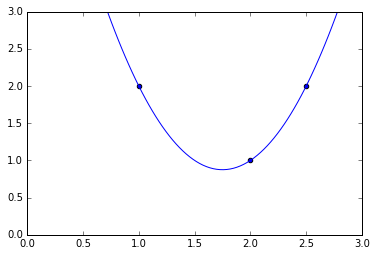

In [17]:
yvals = x[0]*xvals*xvals + x[1]*xvals + x[2] # All y values for the equation of the line
plt.scatter((1,2,2.5), (2,1,2)); plt.plot(xvals,yvals); plt.xlim((0,3)); plt.ylim((0,3));

------------

### Definition of Linearity, and Why Nonlinearity is Hard

We express a function $f$, of variable $x$ and parameters $\vec{s}$ as 
$$f(x; \vec{s})$$

Any function of this form is **linear in its parameters** if it satisfies the following condition:

$$f(x; C_1\vec{s}_1 + C_2\vec{s}_2) = C_1f(x; \vec{s}_1) + C_2f(x; \vec{s}_2)$$

We see that our two previous equations, the line and the parabola, satisfy this condition. We show the proof for the line below.

Let

$$\vec{s} = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \hspace{40pt} C_1\vec{s}_1 + C_2\vec{s}_2 = \begin{bmatrix} C_1\alpha_1 + C_2\alpha_2 \\ C_1\beta_1 + C_2\beta_2 \end{bmatrix} \hspace{40pt} f(x; \vec{s}) = \alpha x + \beta$$




then

$$\begin{array}{lcl} f(x; C_1\vec{s}_1 + C_2\vec{s}_2) & = & (C_1\alpha_1 + C_2\alpha_2) x + (C_1\beta_1 + C_2\beta_2) \\ & = & C_1\alpha_1 x + C_2\alpha_2 x + C_1\beta_1 + C_2\beta_2 \\ & = & C_1\alpha_1 x + C_1\beta_1 + C_2\alpha_2 x + C_2\beta_2 \\ & = & C_1(\alpha_1 x + \beta_1) + C_2(\alpha_2 x + \beta_2) \\ & = & C_1 f(x; \vec{s}_1) + C_2 f(x; \vec{s}_2)\end{array}$$

Here is the key idea. Any equation that is linear in its parameters can be expressed using linear algebra and can be solved using linear least squares techniques. So what happens if we wanted to fit a sinusoid to our data points but be able to control is period, phase, and offest? That would be the following equation

$$ \alpha \sin{(\beta x + \gamma)} + \delta = y$$

One can easily show that this equation can not satisfy the condition outlined above and is therefore not linear in its parameters. As a consequence, the way the problem is posed, it can not be expressed using linear algebra and can not be solved using the technique of linear least squares. This is where the notion of nonlinear least squares (nlls) comes in. We pose the nlls problem as follows. Take a function $f$ that is nonlinear in its parameters and a set of points $\{(x_i, y_i)\}$ that you would like to fit $f$ to. Given an arbitrary choice of parameters $\vec{s}$ we represent the error in a similar manner used above.

$$r_i = y_i - f(x_i; \vec{s})$$

The objective is to find the set of parameters $\vec{s}$ the minimizes the above error for all points $\{(x_i,y_i)\}$. This is a jumping off point because this is a classic problem that can be solved using dozens of techniques. Optimization is the defacto tool, and nearly all methods aimed at solving this can be reduced to an optimization problem. Nonlinear least squares is no exception. As an aside, one can also solve a problem like this using neural networks...

Nonlinear least squares says the following, "I may not know how to solve this nonlinear case, but I do know how to solve a similar linear case." So we approximate this nonlinear problem with a linear one by linearizing the right hand side. 

$$r_i = \sum_{j=1}\frac{\partial f}{\partial s_j}ds_j$$

I will finish this later, but here is the closing point. This above linearization becomes a linear system that can be solved using linear least squares (lls). After solving this lls problem we use the results to update our parameters. We then continue the same process until $||\vec{r}||<\epsilon$. This is the equivalent to a steepest descent type technique.

### Conclusion

So nonlinear least squares (nlls) is considerably harder to solve. Firstly, the cost function in the parameter space does not form a nice convex function. There are often many local minima and finding the global minimum is one of the most difficult problems in optimization. Also, to solve one nlls we must solve dozens sometimes hundreds of lls problems so it is computationally much more expensive. Not to mention the myriad of numerical issues we must face with stability and convergence in using optimization techniques.